In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
with open('70b-40-40-prospect_theory.json') as f:
    raw = json.load(f)

len(raw)
raw[:2]

[['0', '0', 'No.'], ['0', '1', 'No,']]

In [3]:
def parse_raw(raw_json):
    data = []
    for item in raw_json:
        
        gain = int(item[0])
        loss = int(item[1])
        resp = 1 if 'Yes' in item[2] else 0
        data.append([gain, loss, resp])

    return pd.DataFrame(data, columns=['gain', 'loss', 'response'])
    
gambles_df = parse_raw(raw)
gambles_df.head()

,gain,loss,response
0,0,0,0
1,0,1,0
2,0,2,0
3,0,3,0
4,0,4,0


In [4]:
respmat = gambles_df.pivot_table(index='gain', columns='loss', values='response')


Text(0, 0.5, 'Gain')

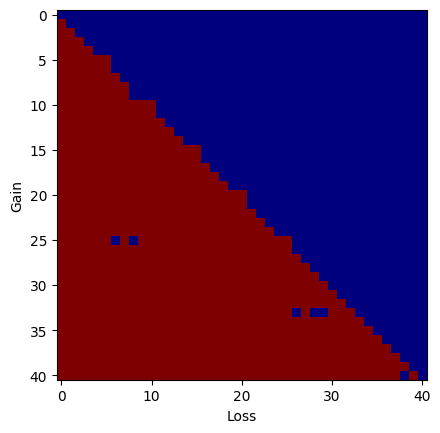

In [5]:
plt.imshow(respmat, cmap='jet')
plt.xlabel('Loss')
plt.ylabel('Gain')

<Axes: xlabel='gain'>

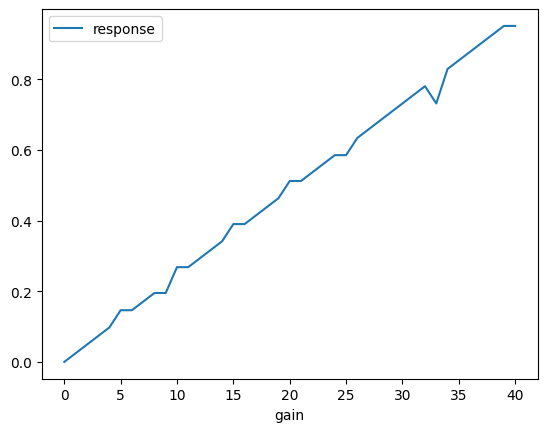

In [6]:
mean_gain = gambles_df.groupby('gain').mean().reset_index()
mean_gain.plot(x='gain', y='response', kind='line')


<Axes: xlabel='loss'>

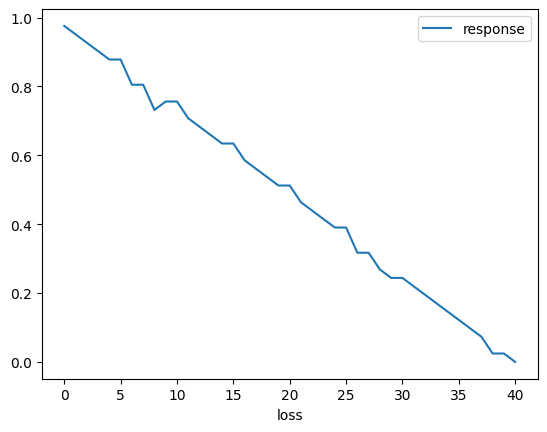

In [7]:
mean_loss = gambles_df.groupby('loss').mean().reset_index()
mean_loss.plot(x='loss', y='response', kind='line')